# **自然言語・可視化・分析ライブラリ**
Word Cloud、nlplot（頻出ワードグラフや共起ネットワーク等の可視化や分析）、TF-IDF計算、word2vecによるワードのベクトル計算と可視化（PCAとt-SNE）を実行します。\
分析したい文書（テキストファイル）を読み込み、「ランタイム→すべてのセルを実行」するだけです。\
前処理（改行, 空白等の処理）→形態素分析→各種視覚化は自動で行います。
- [**注意**] テキストファイルは文字コードを「UTF-8」としてください。

# **ライブラリのインストール**

In [2]:
pip install nlplot

     |████████████████████████████████| 967 kB 5.1 MB/s 
     |████████████████████████████████| 25.3 MB 74.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
#日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (7,112 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [4]:
#Mecabのインストール
!pip install mecab-python3==0.996.5

     |████████████████████████████████| 17.1 MB 4.3 MB/s 


In [5]:
#matplotlib日本語化
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 6.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=875ee3006f890d76e46ed83b20d28c52f0c5b223627d6fa269bc47685dc41081
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [6]:
from pathlib import Path
import pandas as pd
import re
import MeCab
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **ファイル & ストップワード指定**

In [7]:
#@title txtファイル（UTF-8）を指定してください
from google.colab import files
#print('txtファイル(UTF-8）を指定してください')
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving heavy.txt to heavy.txt
User uploaded file "heavy.txt" with length 32057 bytes


In [8]:
#@title ストップワード設定
stop_words = ["し", "い", "ある", "おる", "せる", "ない", "いる", "する", "の", "よう", "なる", "それ", "そこ", "これ", "こう", "ため", "そう", "れる", "られる"]

# **モジュール構築**
- 前処理（改行や空白の処理、センテンス化）、形態素分析、ワード出現回数処理を実行
- 文章を語に分解後、一般名詞・動詞・形容詞（動詞と形容詞は基礎型）のみ抽出（※追加や変更はコード操作が必要）


In [9]:
#@title テキストデータ前処理＆センテンス化
if len(uploaded.keys()) != 1:
    print("アップロードは１ファイルにのみ限ります")
else:
    target = list(uploaded.keys())[0]

with open(target, 'r', encoding='utf-8') as file:
    lines = file.readlines()

#with open(filename, 'r', encoding='utf-8') as file:
#    lines = file.readlines()

lines = [l.strip() for l in lines]
lines = [l.replace('\t','') for l in lines]
lines = [l.replace('"','') for l in lines]
lines = [l.strip('（') for l in lines]
lines = [l.strip('）') for l in lines]

sentences = []
for sentence in lines:
    texts = sentence.split('。')
    sentences.extend(texts)

In [10]:
#@title 前処理後の全文書表示
with open(target, 'r', encoding='utf-8') as all:
    all_text = all.readlines()

#with open(filename, 'r', encoding='utf-8') as all:
#    all_text = all.readlines()

all_text = [l.strip() for l in all_text]
all_text = [l.replace('\t','') for l in lines]
all_text = [l.replace('"','') for l in lines]
all_text = [l.strip('（') for l in lines]
all_text = [l.strip('）') for l in lines]

all_text = ''.join(all_text)
all_text

'ハードロック/ヘヴィメタルは70年代半ばごろから、アリーナ・ロックや産業ロック的なバンドと、アルバム志向のヘヴィメタル・バンドに分かれる傾向も見られ、また、時代が新しくなるにしたがって、シーンも細分化が進んできた。シーンの細分化によって、ヘヴィメタルは様々な「サブジャンル」を持つようになった。このジャンルに分類されるバンドのサウンドはハードロック[5]同様、エレクトリック・ギターのファズやディストーションを強調した、ラウドなものであるのが基本である。ヘヴィメタルという用語自体は、70年前半から存在したが、ハードロックが70年代前半にピークを迎えた後、パンク・ロックの性急感を加えて存続したジャンルである。ハードロックとヘヴィメタルの間に厳密な境界線は無く、ハードロックとヘヴィメタルとを一括りにしてHR/HM（HM/HR）と呼ぶこともある。メンバー構成は、ロックバンド一般に見られるものとあまり変わらないことが多い。ギター、ドラム、ボーカル、ベースを主軸にし、これにキーボードが加わることもある。 ジャンル名の通り、一般的には音の「ヘヴィさ」が重視される。そのためにギターやベースのチューニングを下げて、通常より低い音が出せるようにしている場合がある。ヘヴィメタルではギターソロが重視される場合が多く、たいていの場合は一曲の間にギターソロが挿入される。また、ドラムソロやベースソロも行われることも多く、歌よりも演奏で魅せるような曲も多く、インストゥルメンタルの曲も多い。こういった傾向から、速弾きなどのテクニカルな演奏を得意とするプレイヤーを多く生み出しており、エフェクターなど音楽機材の進化と多様化に多大な影響を与えたとも言われている。代表的なギタリストには、ジミー・ペイジ[6]、トニー・アイオミ、エドワード・ヴァン・ヘイレン、マイケル・シェンカー、アンガス・ヤング、イングヴェイ・マルムスティーン、スティーヴ・ヴァイらがいる。通例、強いディストーションをかけ、リフはパワーコードを主体とした力強い音でミュートを効かせながら刻む場合が多い。ヘヴィメタルバンドにはギタリストが2人いることが多い。リズムギター担当とリードギター担当に分かれている場合と、2人が同じリフを弾いて重さを増している場合や、2人が交互にギターソロを弾くこともある。スケールにはペンタトニック、ハーモニック・マイナー・

In [11]:
#@title センテンスをデータフレームに格納
import pandas as pd
import numpy as np

df_text = pd.DataFrame(sentences, columns = ['text'], index=None)

#空白をNaNに置き換え
df_text['text'].replace('', np.nan, inplace=True)

#Nanを削除 inplace=Trueでdf上書き
df_text.dropna(subset=['text'], inplace=True)

df_text[:15]

,text
0,ハードロック/ヘヴィメタルは70年代半ばごろから、アリーナ・ロックや産業ロック的なバンドと、...
1,シーンの細分化によって、ヘヴィメタルは様々な「サブジャンル」を持つようになった
2,このジャンルに分類されるバンドのサウンドはハードロック[5]同様、エレクトリック・ギターのフ...
3,ヘヴィメタルという用語自体は、70年前半から存在したが、ハードロックが70年代前半にピークを...
4,ハードロックとヘヴィメタルの間に厳密な境界線は無く、ハードロックとヘヴィメタルとを一括りにし...
5,メンバー構成は、ロックバンド一般に見られるものとあまり変わらないことが多い
6,ギター、ドラム、ボーカル、ベースを主軸にし、これにキーボードが加わることもある
7,ジャンル名の通り、一般的には音の「ヘヴィさ」が重視される
8,そのためにギターやベースのチューニングを下げて、通常より低い音が出せるようにしている場合がある
9,ヘヴィメタルではギターソロが重視される場合が多く、たいていの場合は一曲の間にギターソロが挿入される


In [12]:
#@title 形態素解析（一般名詞・動詞:基礎型・形容詞:基礎型）＆カンマ･スペース区切りをデータフレームに格納
#スペース区切り分かち書き
def mecab_analysis(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(text)

    words = []
     
    while node:
        if node.surface != "":  # ヘッダとフッタを除外

            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            #品詞を選択
            if word_type in ["名詞"]: 
                if sub_type in ['一般']:
                    word = node.surface
                    words.append(word)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                words.append(features_[6])

        node = node.next

        if node is None:
            break

    return " ".join(words)

#カンマ区切り分かち書き
def mecab_analysis2(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(text)

    words2 = []

    while(node):

        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            if word_type in ['名詞']:  # 名詞をリストに追加する
                if sub_type in ['一般']:
                    words2.append(node.surface)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                    words2.append(features_[6])

        node = node.next
        if node is None:
            break
    return words2

#スペース区切り分かち書き（全文書一括）
def mecab_analysis3(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(all_text)

    words3 = []
     
    while node:
        if node.surface != "":  # ヘッダとフッタを除外

            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            #品詞を選択
            if word_type in ["名詞"]: 
                if sub_type in ['一般']:
                    all_text_word = node.surface
                    words3.append(all_text_word)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                words3.append(features_[6])

        node = node.next

        if node is None:
            break

    return " ".join(words3)

#形態素結果をリスト化し、データフレームdf_textに列を追加して格納
df_text['words'] = df_text['text'].apply(mecab_analysis)
df_text['words2'] = df_text['text'].apply(mecab_analysis2)

df_text[:15]

,text,words,words2
0,ハードロック/ヘヴィメタルは70年代半ばごろから、アリーナ・ロックや産業ロック的なバンドと、...,ヘヴィメタル 産業 バンド アルバム ヘヴィメタル・バンド 分かれる 傾向 見る 時代 新し...,"[ヘヴィメタル, 産業, バンド, アルバム, ヘヴィメタル・バンド, 分かれる, 傾向, ..."
1,シーンの細分化によって、ヘヴィメタルは様々な「サブジャンル」を持つようになった,シーン ヘヴィメタル サブ ジャンル 持つ,"[シーン, ヘヴィメタル, サブ, ジャンル, 持つ]"
2,このジャンルに分類されるバンドのサウンドはハードロック[5]同様、エレクトリック・ギターのフ...,ジャンル バンド サウンド ハード エレクトリック ギター ファズ ディストーション ラウド 基本,"[ジャンル, バンド, サウンド, ハード, エレクトリック, ギター, ファズ, ディスト..."
3,ヘヴィメタルという用語自体は、70年前半から存在したが、ハードロックが70年代前半にピークを...,用語 自体 前半 前半 ピーク 迎える 加える ジャンル,"[用語, 自体, 前半, 前半, ピーク, 迎える, 加える, ジャンル]"
4,ハードロックとヘヴィメタルの間に厳密な境界線は無く、ハードロックとヘヴィメタルとを一括りにし...,ヘヴィメタル 間 境界 無い ヘヴィメタル 括る HR HM 呼ぶ,"[ヘヴィメタル, 間, 境界, 無い, ヘヴィメタル, 括る, HR, HM, 呼ぶ]"
5,メンバー構成は、ロックバンド一般に見られるものとあまり変わらないことが多い,メンバー ロックバンド 一般 見る 変わる 多い,"[メンバー, ロックバンド, 一般, 見る, 変わる, 多い]"
6,ギター、ドラム、ボーカル、ベースを主軸にし、これにキーボードが加わることもある,ギター ドラム ボーカル ベース 主軸 キーボード 加わる,"[ギター, ドラム, ボーカル, ベース, 主軸, キーボード, 加わる]"
7,ジャンル名の通り、一般的には音の「ヘヴィさ」が重視される,ジャンル 通り 一般 音,"[ジャンル, 通り, 一般, 音]"
8,そのためにギターやベースのチューニングを下げて、通常より低い音が出せるようにしている場合がある,ギター ベース チューニング 下げる 通常 低い 音 出せる,"[ギター, ベース, チューニング, 下げる, 通常, 低い, 音, 出せる]"
9,ヘヴィメタルではギターソロが重視される場合が多く、たいていの場合は一曲の間にギターソロが挿入される,ヘヴィメタル ギター ソロ 多い 間 ギター ソロ,"[ヘヴィメタル, ギター, ソロ, 多い, 間, ギター, ソロ]"


In [13]:
#@title 全文書の形態素結果をデータフレームdfに格納
df = pd.Series(all_text)
df = df.apply(mecab_analysis3)

In [14]:
#@title ワード出現回数カウント（表示する場合は#外す）
#カンマ区切り分かち書きしたワードをリスト化
words_list = df_text.words2.tolist()
words_list = sum(words_list,[])

from collections import Counter

#出現回数を集計し、最頻順にソートし、resultに格納
words_count = Counter(words_list)
result = words_count.most_common()

#出現回数結果を画面に出力
#for word, cnt in result:
#    print(word, cnt)

# **nlplot**
「nlplot」は、自然言語の可視化・分析できるライブラリです。
- N-gram bar chart, N-gram tree Map, Histogram of the word count, wordcloud, co-occurrence networks（共起ネットワーク）, sunburst chart（サンバースト）

In [17]:
#@title uni-gram表示
import nlplot

npt = nlplot.NLPlot(df_text, target_col='words')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
#stopwords = npt.get_stopword(top_n=0, min_freq=0)

npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
#    stopwords=stopwords,
)

100%|██████████| 143/143 [00:00<00:00, 39807.89it/s]


In [18]:
#@title tree-map表示
npt.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
#    stopwords=stopwords,
)

100%|██████████| 143/143 [00:00<00:00, 50495.49it/s]


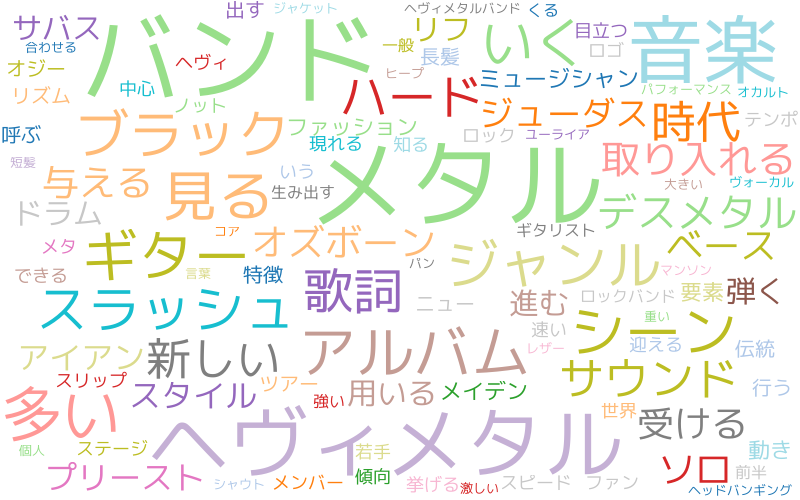

In [19]:
#@title Word Cloud表示（nlpot）
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
#    stopwords=stopwords,
)

In [20]:
#@title Word Distribution表示（単語数の分布）
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

In [21]:
#@title Build Graph（共起ネットワーク）表示
# ビルド（データ件数によっては処理に時間を要します）※ノードの数のみ変更
npt.build_graph(min_edge_frequency=1,
                #stopwords=stopwords,
                )

display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

npt.co_network(
    title='Co-occurrence network',
)

node_size:142, edge_size:328


,id,id_code,adjacency_frequency,betweeness_centrality,clustering_coefficient,community
0,メタ,0,4,0.001050,0.833333,0
1,若手,1,3,0.000000,1.000000,1
2,いく,2,15,0.006681,0.419048,0
3,規模,3,1,0.000000,0.000000,1
4,サブ,4,1,0.000000,0.000000,5


(142, 6)

,source,target,edge_frequency,source_code,target_code
0,バンド,メタル,12,114,75
1,バンド,音楽,9,114,33
2,メタル,音楽,8,75,33
3,スラッシュ,メタル,8,12,75
4,ブラック,メタル,6,28,75


(328, 5)

In [22]:
#@title Sunburst表示
npt.sunburst(
    title='All sentiment sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=800,
    height=600,
    #save=True
)

# **Word Cloud**
- ワードクラウドは、文章中で出現頻度が高い語を複数選び出し、その頻度に応じた大きさで図示する手法。
- 表示するワードクラウドは全3種。①ワード出現回数ベース／②TF-IDFベース（全データ）/③TF-IDFベース（センテンス）\
※語の表示数はmax_words, Word Cloudの表示サイズはwidth, heightで設定できる

## **TF-IDF**
TF-IDF は ワードの出現頻度とレア度が考慮された指標

\begin{eqnarray} TF(d,w) &=& \frac{文書d における語wの出現回数}{文書d における全語の出現回数の和}\\ IDF(w) &=& log(\frac{全文書数}{語w を含む文書数})\\ TFIDF(d,w) &=& TF(d,w) \times IDF(w) \end{eqnarray}

- センテンス毎にTF-IDFを算出、センテンス×wordマトリクスをcsv出力(tfidf.csv)
- 文書全体でTF-IDFを算出したWord cloudを描画
- [**参考**] 指定センテンスのWord cloud描画も可能（Defaultは非表示、センテンスは任意指定）

In [23]:
#@title TF-IDFマトリクス作成＆データフレーム格納
# ライブラリインポート
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDFのベクトル処理
vectorizer = TfidfVectorizer(use_idf=True)
tfidf = vectorizer.fit_transform(df_text['words'])

# TF-IDF値を「センテンス×ワード」マトリクスをデータフレーム化
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names(), index=df_text['words'])
display(df_tfidf)

,ac,baizley,bowwow,bpm,dj,fight,helter,hm,hr,john,loudness,metal,nwobhm,pta,seth,show,skelter,sm,st,thunder,tシャツ,vow,wow,ya,あらわれる,いう,いえる,いく,うめく,おどろおどろしい,かける,かたどる,きっかけ,くる,させる,したがう,しまう,そのもの,たどる,ため,...,趣味,踏む,身体,迎える,迷彩,通り,通例,通常,速い,進む,過程,違う,重い,重き,重厚,重圧,金切り声,金属,長調,長髪,降らせる,集める,集団,雑誌,電子,音域,音楽,風味,飛ばす,駆け抜ける,高い,高速,高音,高齢,魅せる,魔法使い,麻薬,黄金,黒い,黒人
words,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ヘヴィメタル 産業 バンド アルバム ヘヴィメタル・バンド 分かれる 傾向 見る 時代 新しい したがう シーン 進む くる,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292179,0.0,0.336364,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.256506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
シーン ヘヴィメタル サブ ジャンル 持つ,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ジャンル バンド サウンド ハード エレクトリック ギター ファズ ディストーション ラウド 基本,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
用語 自体 前半 前半 ピーク 迎える 加える ジャンル,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.290983,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ヘヴィメタル 間 境界 無い ヘヴィメタル 括る HR HM 呼ぶ,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.361915,0.39204,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
オズボーン 動き ベテラン バンド 新しい バンド 新旧 問う イベント 育てる,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
音楽 業界 ブーム ベテラン バンド,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.302943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
モトリー・クルー ツアー 収める,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [24]:
#@title TF-IDFマトリクスをcsv出力（ローカルファイルに出力する場合はfiles.downloadの#外す）
from google.colab import files
df_tfidf.to_csv('tfidf.csv',encoding='utf_8_sig')
#files.download('tfidf.csv') 

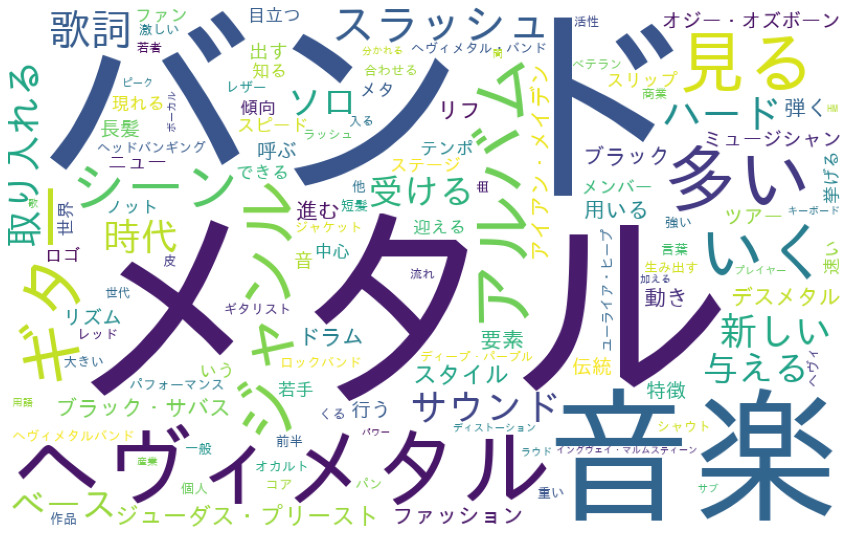

In [32]:
#@title Word Cloud by word_count（All Data）：🔲型 → #maskの#外すと🍩型に

#wordcloud取込用にresultを辞書型ヘ変換
dic_result = dict(result)

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
from wordcloud import WordCloud

#画像データダウンロード（biwakoの画像リンクもあり。変更する場合は#調整）
import requests

url = "https://github.com/hima2b4/Word-Cloud/raw/main/donuts.png"
#url = "https://github.com/hima2b4/Word-Cloud/raw/main/biwa.png"

file_name = "donuts.png"
#file_name = "biwa.png"

response = requests.get(url)
image = response.content

with open(file_name, "wb") as f:
    f.write(image)

#ライブラリインポート
from PIL import Image
import numpy as np

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
custom_mask = np.array(Image.open('donuts.png'))
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      #mask=custom_mask,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=800,
                      height=500,
                      ).fit_words(dic_result)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

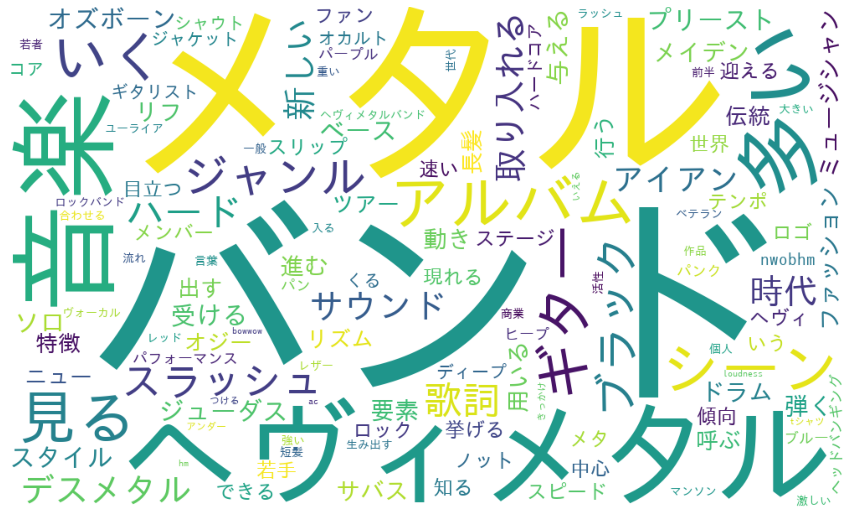

In [25]:
#@title 全文書TF-IDF計算＆Word Cloud（TF-IDF）表示
# TF-IDF計算
tfidf_vec2 = vectorizer.fit_transform(df).toarray()[0]
# TF-IDFを辞書化
tfidf_dict2 = dict(zip(vectorizer.get_feature_names(), tfidf_vec2))
# 値が正のkeyだけ残す
tfidf_dict2 = {k: v for k, v in tfidf_dict2.items() if v > 0}

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600,
                      ).generate_from_frequencies(tfidf_dict2)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [26]:
#@title 指定センテンスのTF-IDF計算＆Word Cloud表示
tfidf_vec = vectorizer.fit_transform(df_text['words']).toarray()[0]
# TF-IDFを辞書化
tfidf_dict = dict(zip(vectorizer.get_feature_names(), tfidf_vec))
# 値が正のkeyだけ残す
tfidf_dict = {k: v for k, v in tfidf_dict.items() if v > 0}

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600,
                      ).generate_from_frequencies(tfidf_dict)

#生成した画像の表示
#plt.figure(figsize=(15,10))
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

※参考：このWord Cloudは指定センテンスの語のみを対象としたもの\
※表示する場合は #を外して実行\
※tfidf_vec = vectorizer.fit_transform(df_text['words']).toarray()[0] ←センテンスはこの数値で指定\
※語の表示数はmax_words, Word Cloudの表示サイズはwidth, heightで設定できる

# **Visualization of word2vec**

In [27]:
#@title Word2Vecモジュール（語の最小出現数やベクトル生成手法等の設定）
from gensim.models import word2vec

# size : 中間層のニューロン数・数値に応じて配列の大きさが変わる。数値が多いほど精度が良くなりやすいが、処理が重くなる。
# min_count : この値以下の出現回数の単語を無視
# window : 対象単語を中心とした前後の単語数
# iter : epochs数
# sg : skip-gramを使うかどうか 0:CBOW 1:skip-gram

model = word2vec.Word2Vec(df_text['words2'],
                          size=200,
                          min_count=10,
                          window=5,
                          iter=20,
                          sg = 1)    # sg=1:skip-gram使用

#学習結果
#print(model.wv.vectors.shape)  # 分散表現の形状
#print(model.wv.vectors)  #分散表現の配列

In [28]:
#@title ベクトル化した各語彙確認（表示する場合は#外す）
#ベクトル化したテキストの各語彙確認
#model.wv.index2word

<Figure size 432x288 with 0 Axes>

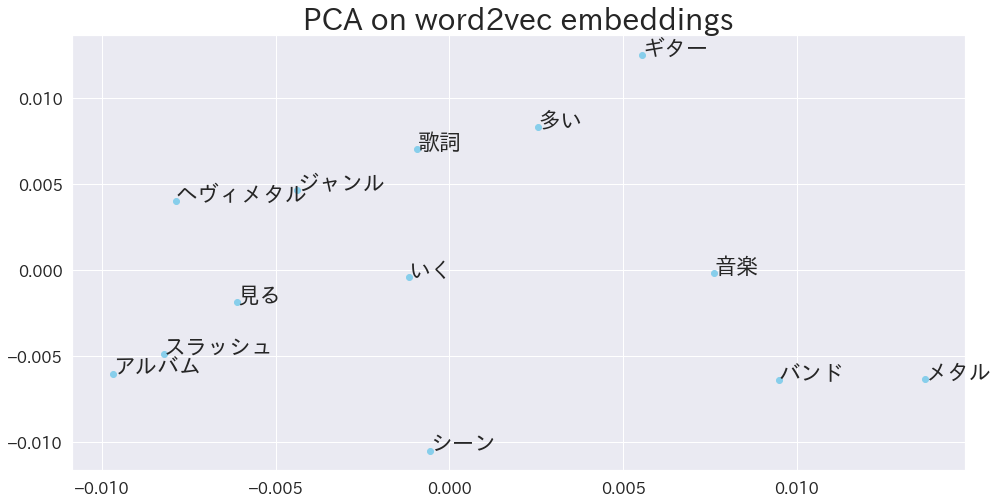

In [29]:
#@title PCA表示
#PCA実行
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
values = pca.fit_transform(model.wv.vectors)
#print(values.shape)
#print(values)

#PCA可視化
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

sns.set(font="IPAexGothic")
plt.rcParams["font.size"] = 22
plt.tight_layout()
fig = plt.figure(figsize=(16,8))
for value, word in zip(values, model.wv.index2word):
    plt.plot(value[0], value[1], marker='o',color='skyblue')
    plt.annotate(word, (value[0], value[1]))
    plt.title('PCA on word2vec embeddings', fontsize=30)
    #plt.xlim(-0.02,0.04)
    #plt.ylim(-0.02,0.04)
    plt.xticks(fontsize= 16)
    plt.yticks(fontsize= 16)
plt.show()

<Figure size 432x288 with 0 Axes>

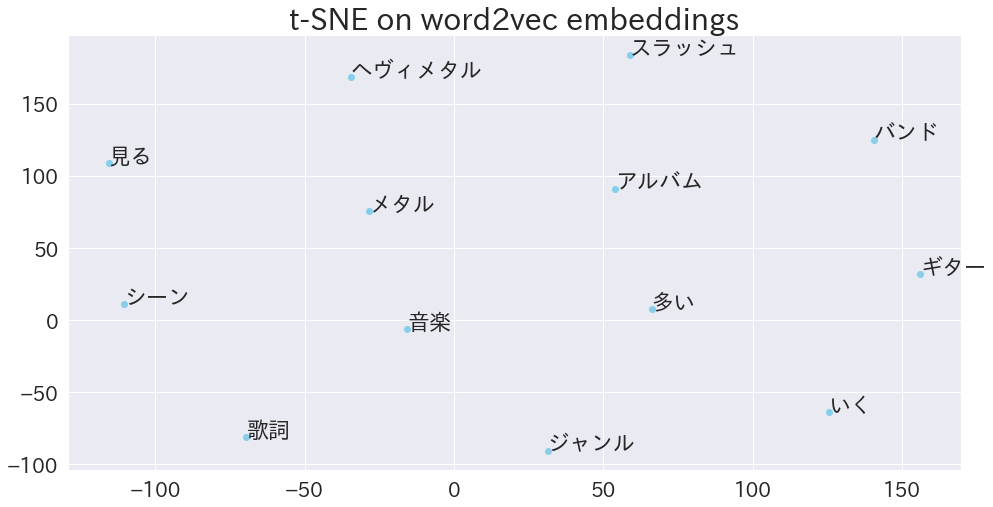

In [31]:
#@title t-SNE表示
#t-SNE実行
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
values2 = tsne.fit_transform(model.wv.vectors)

#t-SNE可視化
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

sns.set(font="IPAexGothic")
plt.rcParams["font.size"] = 22
plt.tight_layout()
fig = plt.figure(figsize=(16,8))
for value, word in zip(values2, model.wv.index2word):
    plt.plot(value[0], value[1], marker='o',color='skyblue')
    plt.annotate(word, (value[0], value[1]))
    plt.title('t-SNE on word2vec embeddings', fontsize=30)
    #plt.xlim(-0.02,0.04)
    #plt.ylim(-0.02,0.04)
    plt.xticks(fontsize= 20)
    plt.yticks(fontsize= 20)
plt.show()

## **参考サイト**
- [**【データ分析実践】口コミを使ったキャンプ場に関する分析3 ~ Word2Vec編 ~**](https://data-analytics.fun/2020/03/12/word2vec/)

- [**Janomeで TF-IDF をやってみた**](https://zenn.dev/megane_otoko/articles/013_tf_idf_trial)

- [**ニュース記事をword2vecでベクトル化して可視化するレシピ**](https://axross-recipe.com/recipes/34)

- [**自然言語を簡単に可視化・分析できるライブラリ「nlplot」を公開**](https://www.takapy.work/entry/2020/05/17/192947)